## Output Analysis of Sentiment Scores


In [3]:
# Load Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('output_sentiment.csv')

# Analysis Label x Date x Comment Count

In [5]:
df = pd.read_csv('output_sentiment.csv')

C:\Users\zilch\AppData\Local\Temp\ipykernel_22600\919666467.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


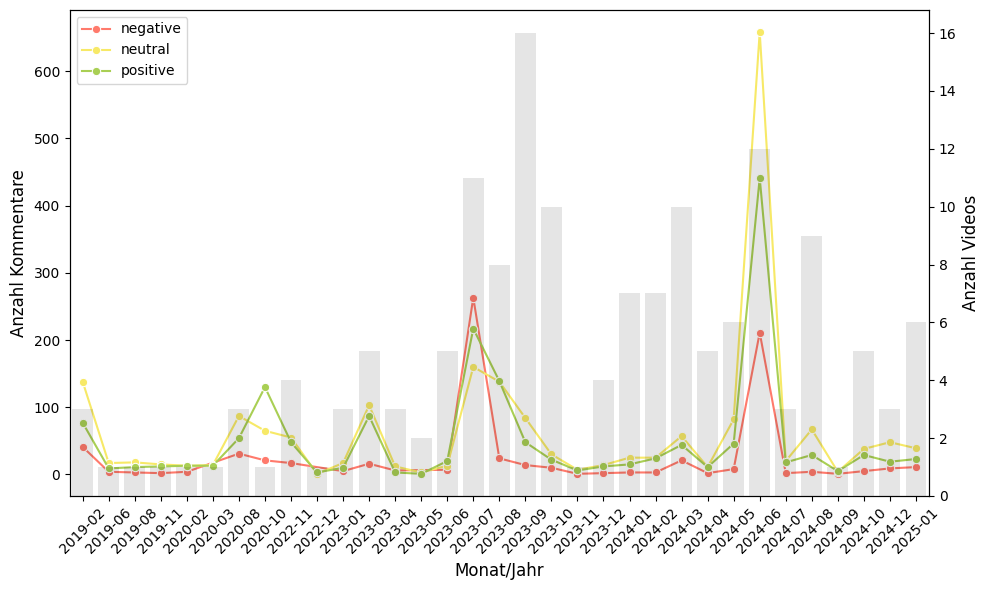

In [6]:
df['Upload Date'] = pd.to_datetime(df['Upload Date'], format='%d.%m.%Y')
df['month_year'] = df['Upload Date'].dt.to_period('M')

df['month_year'] = df['month_year'].astype(str)

df_grouped = df.groupby(['month_year', 'roberta_label']).size().reset_index(name='comment_count')

df_video_count = df.groupby('month_year')['Video ID'].nunique().reset_index(name='video_count')

label_colors = {"positive": "#A9CF54", "neutral": "#F7E967", "negative": "#ff7a6c"}

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_grouped, x='month_year', y='comment_count', hue='roberta_label', marker='o', palette=label_colors, ax=ax1)

ax2 = ax1.twinx()
sns.barplot(data=df_video_count, x='month_year', y='video_count', color='black', alpha=0.1, ax=ax2)

ax1.set_xlabel("Monat/Jahr", fontsize=12)
ax1.set_ylabel("Anzahl Kommentare", fontsize=12)
ax2.set_ylabel("Anzahl Videos", fontsize=12, color='black')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(loc='upper left')
ax2.tick_params(axis='y', labelcolor='black')
fig.tight_layout()

plt.show()


# Dauer x Kommentare


In [7]:
df = pd.read_csv('output_sentiment.csv')

<Figure size 800x600 with 0 Axes>

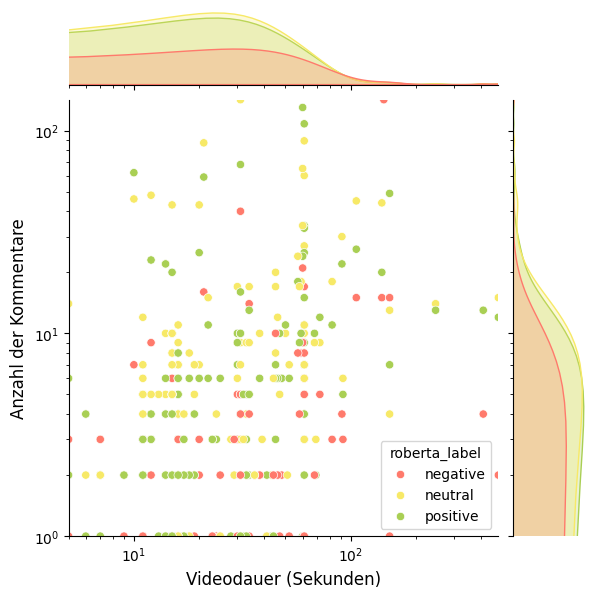

In [8]:
df["Upload Date"] = pd.to_datetime(df["Upload Date"], format="%d.%m.%Y")

df_grouped = df.groupby(["Video ID", "Duration", "roberta_label"]).agg({"comment": "count"}).reset_index()
df_grouped.rename(columns={"comment": "comment_count"}, inplace=True)

label_colors = {"positive": "#A9CF54", "neutral": "#F7E967", "negative": "#ff7a6c"}

df_grouped = df_grouped[(df_grouped["Duration"] > 0) & (df_grouped["comment_count"] > 0)]

duration_max = np.percentile(df_grouped["Duration"], 99)
comment_max = np.percentile(df_grouped["comment_count"], 99)
df_grouped = df_grouped[(df_grouped["Duration"] <= duration_max) & (df_grouped["comment_count"] <= comment_max)]

plt.figure(figsize=(8, 6))
g = sns.jointplot(
    data=df_grouped,
    x="Duration",
    y="comment_count",
    kind="scatter",
    hue="roberta_label",
    palette=label_colors
)

ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(df_grouped["Duration"].min(), df_grouped["Duration"].max())
ax.set_ylim(df_grouped["comment_count"].min(), df_grouped["comment_count"].max())
ax.set_xlabel("Videodauer (Sekunden)", fontsize=12)
ax.set_ylabel("Anzahl der Kommentare", fontsize=12)

plt.show()


# Polarity x Videodauer

In [9]:
df = pd.read_csv('output_sentiment.csv')

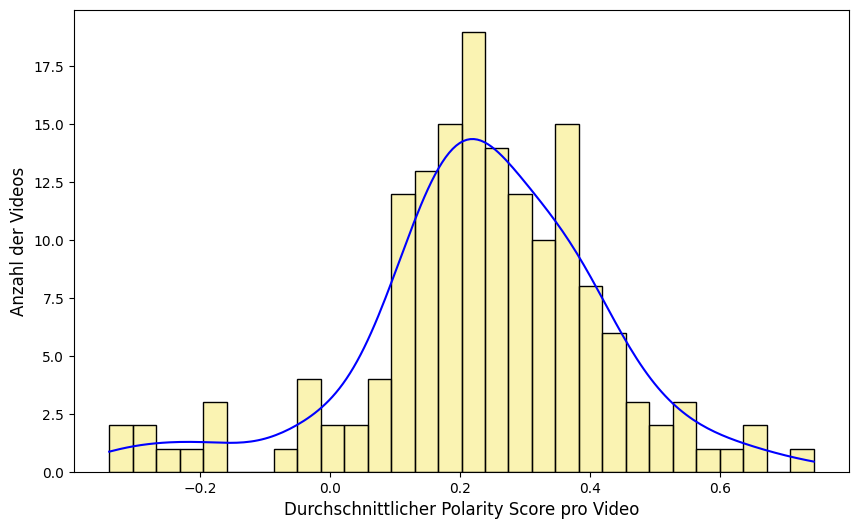

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(df_video_polarity["roberta_polarity"], bins=30, kde=True, color="#F7E967")

for line in ax.lines:
    line.set_color("#0000FF")

plt.xlabel("Durchschnittlicher Polarity Score pro Video", fontsize=12)
plt.ylabel("Anzahl der Videos", fontsize=12)

plt.show()
